# No TF Approach

In [34]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

""" Extracting data """
true_train_df = pd.read_csv("datasets/train.csv")
true_test_df = pd.read_csv("datasets/test.csv")

X = np.array([np.array(true_train_df.iloc[:, i]) for i in range(true_train_df.shape[1] - 1)])  # "-1" is to exclude the "quality" column
X_test = np.array([np.array(true_test_df.iloc[:, i]) for i in range(true_test_df.shape[1])])

Y = np.array(true_train_df.iloc[:, -1]).reshape(-1, 1)

Y_test = pd.read_csv("datasets/sample_sub.csv")
Y_test = np.array(Y_test.iloc[:, 1]).reshape(-1, 1)

# one-hot encoding: for "type" feature, white = 0 and not_white = 1
X[0, :] = np.where(X[0, :] == "white", 0, 1)
X_test[0, :] = np.where(X_test[0, :] == "white", 0, 1)

# convert all to float64
X = X.astype(np.float64)
X_test = X_test.astype(np.float64)
""" Normalization """
def map(x, in_min, in_max, out_min, out_max):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def normalize(x):
    in_min = np.min(x, axis=0)
    in_max = np.max(x, axis=0)
    out_min = 0
    out_max = 1

    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

X = normalize(X)
X_test = normalize(X_test)

Y = normalize(Y)
Y_test = normalize(Y_test)

In [35]:
delta = 0.25  # very small delta doesnt allow the model to get over local minimas
W = np.random.uniform(low=0.5-delta, high=0.5+delta, size=(X.shape[0], 1))
b = 0

m = X.shape[1]

def cost(X, W, reg):
    Y_pred = W.T @ X + b
    m = X.shape[1]
    J = (1/(2*m)) * np.sum( (Y - Y_pred)**2 ) + (reg/(2*m)) * np.sum(W**2, axis=0)
    return J

def update(lr, reg=0):  # lr -> learning rate; reg -> regularization
    global W, b

    Y_pred = (W.T @ X + b).T

    # """ Traditional Gradient Descent """
    # dW = (-1/m) * (X @ (Y - Y_pred))
    # db = (-1/m) * np.sum(Y - Y_pred, axis=0)

    # W -= lr * dW
    # b -= lr * db

    # """ Stocastic Gradient Descent """
    # for i in range(X.shape[1]):
    #     Y_pred = (W.T @ X[:, i] + b).T

    #     dW = -1 * ((Y[i] - Y_pred) * X[:, i]).reshape(-1, 1) + (reg/m) * np.sum(W, axis=0)
    #     db = -1 * (Y[i] - Y_pred)

    #     W -= lr * dW
    #     b -= lr * db

    """ Batch Gradient Descent """
    batch_size = 32  # Set the desired batch size

    # Calculate the number of batches
    num_batches = X.shape[1] // batch_size

    for _ in range(num_batches):
        # Select a batch of samples
        batch_start = _ * batch_size
        batch_end = batch_start + batch_size
        batch_X = X[:, batch_start:batch_end]
        batch_Y = Y[batch_start:batch_end]

        # Compute predictions for the batch
        batch_Y_pred = (W.T @ batch_X + b).T

        # Compute gradients for the batch
        dW = (-1 / batch_size) * (batch_X @ (batch_Y - batch_Y_pred))
        db = (-1 / batch_size) * np.sum(batch_Y - batch_Y_pred, axis=0)

        # Update weights and bias using gradients
        W -= lr * dW
        b -= lr * db

    return cost(X, W, reg)
    

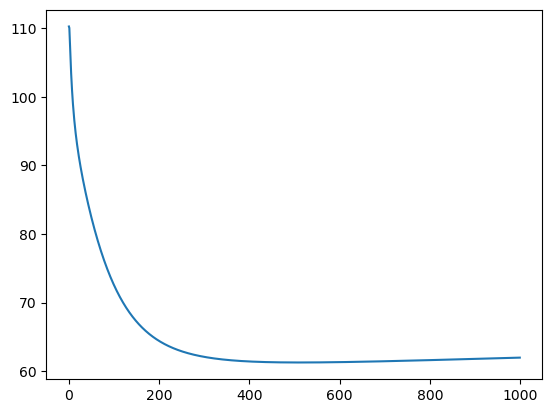

In [36]:
lr = 0.9
decay_step = 50
decay_rate = 0.5

reg = 1000
iterations = 10**3

J = []

for i in range(iterations):
    # if i % decay_step == 0:
    #     lr *= decay_rate

    J.append(update(lr, reg))

x = np.arange(len(J))
plt.plot(x, J)
plt.show()

In [37]:
Y_pred = (W.T @ X_test + b)

Y_test = map(Y_test, np.min(Y_test), np.max(Y_test), 0, 10).reshape(-1, 1)
Y_pred = map(Y_pred, np.min(Y_pred), np.max(Y_pred), 0, 10).reshape(-1, 1)

print(cost(X, W, reg))
print(cost(X_test, W, reg))

[61.96999969]
[64.92291516]


# TF Approach